#Parte 2: Analisi dati

Alcune domande a cui possiamo rispondere analizzando questi dati: 
- quali sono le possibili locazioni degli utenti che hanno pubblicato
- il periodo di riferimento dei tweet
- quanti sono i retweet
- quanti sono stati retweetati
- l'hastag piu usato

In [2]:
import pandas as pd

In [3]:
# MONTO IL DISCO DRIVE GOOGLE PERSONALE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BritishGB_tweet_1000.csv")

In [ ]:
df.head()

###Domanda 1: quali sono le possibili locazioni degli utenti che hanno pubblicato

In [6]:
df["user_location"].value_counts()[:20] #visualizzo i primi 20 risultati

Italia                            78
Italy                             32
Cagliari, Sardegna                22
roma                              10
she/her                            9
Bari, Puglia                       9
Milano, Lombardia                  9
Nettuno                            8
ITALY                              8
Roma, Lazio                        8
Bergamo, Lombardia                 8
Modena, Emilia Romagna             8
Varese, Lombardia                  7
Yokosuka,JP / Stuttgart,DE         6
Como, Lombardia                    6
Piemonte, Italia                   6
Sala Consilina, Vallo di Diano     6
Italia                             6
Milan, Italy                       6
Fuoco                              6
Name: user_location, dtype: int64

Osserviamo che sarebbe necessario fare un pre-processing per contare correttamente le località in quando ad esempio Roma compare con diversi nomi a seconda del formato. 

### Domanda 2: vediamo la distribuzione dei tweet sul periodo andando a creare un istogramma con i tweet di ogni giorno

In [7]:
df["date"]

0       2022-07-10 02:59:11
1       2022-07-10 00:23:14
2       2022-07-09 18:24:52
3       2022-07-09 13:32:45
4       2022-07-09 09:51:44
               ...         
1106    2022-07-03 16:53:35
1107    2022-07-03 16:16:27
1108    2022-07-03 14:38:23
1109    2022-07-03 16:20:23
1110    2022-07-04 06:33:45
Name: date, Length: 1111, dtype: object

In [8]:
# devo effettuare una conversione in modo che venga riconosciuto come data 
pd.to_datetime(df["date"])

0      2022-07-10 02:59:11
1      2022-07-10 00:23:14
2      2022-07-09 18:24:52
3      2022-07-09 13:32:45
4      2022-07-09 09:51:44
               ...        
1106   2022-07-03 16:53:35
1107   2022-07-03 16:16:27
1108   2022-07-03 14:38:23
1109   2022-07-03 16:20:23
1110   2022-07-04 06:33:45
Name: date, Length: 1111, dtype: datetime64[ns]

In [9]:
# per poter considerare solo la data effettuiamo una sorta di approssimazione nel modo seguente:
pd.to_datetime(df["date"]).dt.floor("d") #approssimo al giorno

0      2022-07-10
1      2022-07-10
2      2022-07-09
3      2022-07-09
4      2022-07-09
          ...    
1106   2022-07-03
1107   2022-07-03
1108   2022-07-03
1109   2022-07-03
1110   2022-07-04
Name: date, Length: 1111, dtype: datetime64[ns]

In [10]:
# andiamo infine a considerare le occorrenze di ciascun giorno 
pd.to_datetime(df["date"]).dt.floor("d").value_counts().rename_axis("date").reset_index(name="count")

,date,count
0,2022-07-04,448
1,2022-07-05,406
2,2022-07-06,98
3,2022-07-03,78
4,2022-07-07,33
5,2022-07-08,31
6,2022-07-09,8
7,2022-07-10,2
8,2022-07-02,2
9,2022-06-30,2


In [11]:
# rimuovo il tweet del 2016 a cui non sono interessato
df = df.drop(df[df["date"]<"2022-01-01"].index)

In [ ]:
df.head()

La query è stata lanciata in data 19/06/2022 alle 19 circa

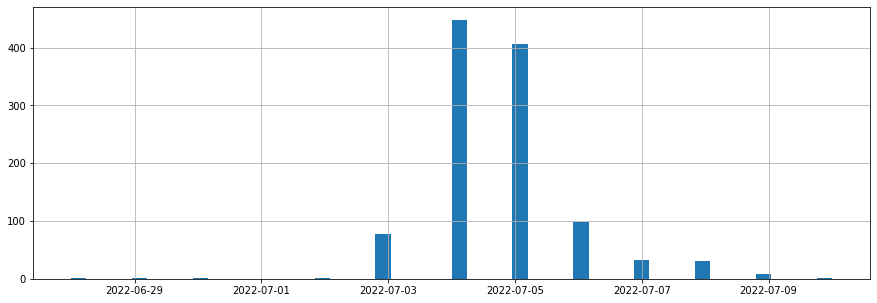

In [15]:
# creiamo l'istogramma
import matplotlib.pyplot as plt

pd.to_datetime(df["date"]).dt.floor("d").hist(bins=50, figsize=(15,5))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Distribuzione_temporale_tweet.jpg')  

Osserviamo che nei giorni precedenti si hanno pochi tweet. Questo potrebbe essere legato al fatto che il picco è legato al fatto che ci sono retweet di tweet pubblicati nei giorni precedenti.

In [16]:
filtered = df[df['date']<"2022-07-05"] #andiamo ad esaminare cosa succede se prendo solo i tweet pubblicati prima del 12/06

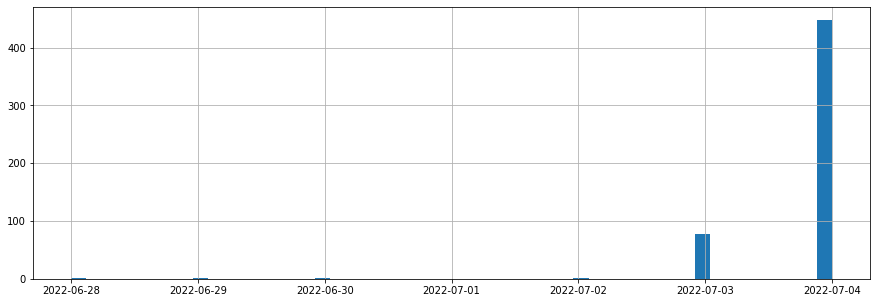

In [17]:
pd.to_datetime(filtered["date"]).dt.floor("d").hist(bins=50, figsize=(15,5))


In [ ]:
# faccio un cast rendendo questo df una lista di ID
filtered_ids = list(filtered["id"])

#per ciascun ID accedo al campo retweet_original_tweet_id
for id in filtered_ids:
    retweet = df[df['retweet_original_tweet_id']==id] #prendo solo le istanze in cui ho un retweet
    #retweet sarà 0 se non è un retweet maggiore di zero se è stato retweetato

    if len(retweet==0):
        print(f"{id} - Pubblicato in data:{df[df['id']==id]['date'].item()} - è stato retweettato {len(retweet)} volte")
    else: 
        print(f"{id} - Pubblicato in data:{df[df['id']==id]['date'].item()} - non è stato retweettato")


Questo mostra che i tweet effettuati prima del 11/06 sono stati retweettati

### **Domanda 3**: Tra i tweet ricavati quanti sono dei retweet?

In [19]:
#numero totale tweet 
num_tot_tweet = len(df)
num_tot_tweet

1110

In [20]:
#numero tweet originali (che non sono dei retweet)
# nella colonna retweet_original_tweet_id compare Nan se non sono originali!

num_orig_tweet = sum(df['retweet_original_tweet_id'].isna()) # mi dice True se il valore è Nan e sum conta i True!
num_orig_tweet

400

In [21]:
# numero di retweet: differenza tra i due
num_tot_tweet - num_orig_tweet


710

In [22]:
#alternativa per il calcolo del numero di retweet
sum(~df['retweet_original_tweet_id'].isna())

710

Il numero di tweet retweettati da qualcuno li ottengo tramite il campo retweet count

In [23]:
len(df[df["retweet_count"]>0])

941

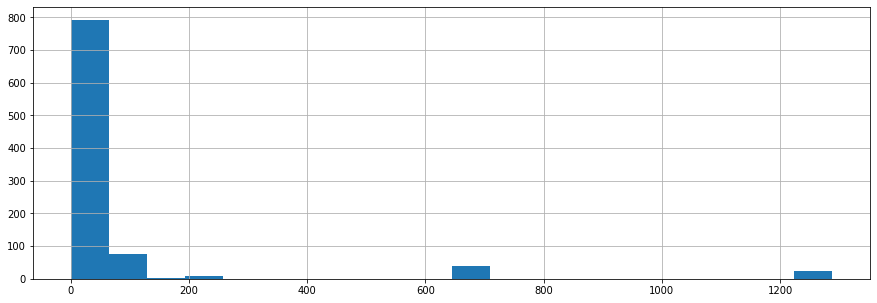

In [24]:
df[df["retweet_count"]>0]["retweet_count"].hist(bins=20, figsize=(15,5))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Retweet_count.jpg')  

Andiamo invece a vedere i tweet che non hanno retweet

In [ ]:
df[df["retweet_count"]==207]

In [ ]:
df[df["retweet_count"]==646]["text"].unique()

In [74]:
df[df["retweet_count"]==1288]["text"].unique()

array(['RT @TelemetricoF1: Tremendo accidente de @ZhouGuanyu24 \n\n#BritishGP #telemetricof1 https://t.co/JFFNoiWVd9',
       'Tremendo accidente de @ZhouGuanyu24 \n\n#BritishGP #telemetricof1 https://t.co/JFFNoiWVd9'],
      dtype=object)

In [78]:
df[df["retweet_count"]==207]["text"].unique()

array(['RT @SmilexTech: Leclerc si trovi a 43 punti da Verstappen. Sono ~ i punti che tra Monaco e Silverstone il muretto gli ha fatto perdere. Ed…',
       "Leclerc si trovi a 43 punti da Verstappen. Sono ~ i punti che tra Monaco e Silverstone il muretto gli ha fatto perdere. Ed è la più grande differenza che esiste tra Red Bull e Ferrari. Non l'affidabilità, non le prestazioni della vettura, non i piloti @formu1a__uno #BritishGP"],
      dtype=object)

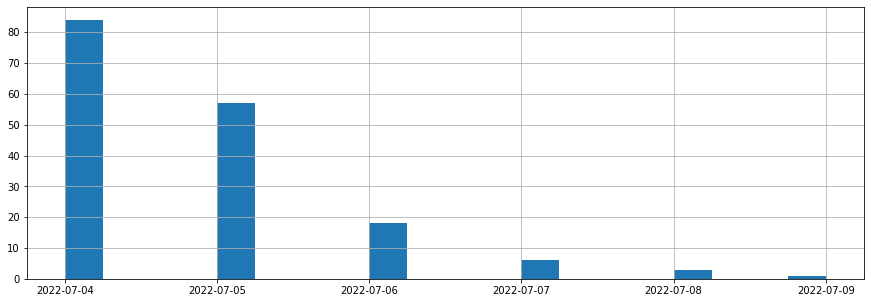

In [25]:
filtered = df[df["retweet_count"]==0]
pd.to_datetime(filtered["date"]).dt.floor("d").hist(bins=20, figsize=(15,5))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Distribuzione_tweet_senza_retweet.jpg')  

# Parte 3
## Iniziamo a ragionare ora sugli hashtag
vediamo alcune esplorazione sui campi di hastags

In [26]:
df["hashtags"]

0       ['F1', 'Ferrari', 'BritishGP', 'Carlos55', 'Ch...
1                                                     NaN
2                                                     NaN
3                                           ['BritishGP']
4                          ['essereFerrari', 'BritishGP']
                              ...                        
1106                                                  NaN
1107                                                  NaN
1108                                                  NaN
1109                                                  NaN
1110                                                  NaN
Name: hashtags, Length: 1110, dtype: object

innanzitutto ragioniamo su come deve essere strutturato il dato per poter essere dato in pasto ad un algoritmo che mi estrae una **word-cloud**. 

Nella word-cloud a ciascuna parola viene data una dimensione proporzionale al numero di occorrenze di tale parola.

vogliamo quind una lista di hashtag ed un conteggio associato ad essi.


il primo problema: ogni elemento della colonna hashtag è una lista di parole che però sono interpretate dal dataframe come una stringa.

In [27]:
type(df["hashtags"].loc[0])

str

In [28]:
#usiamo il metodo python eval per processare la stringa 
eval(df["hashtags"].loc[0])

['F1', 'Ferrari', 'BritishGP', 'Carlos55', 'Charles16']

In [29]:
#prendiamo la colonna degli hashtags considerando solo gli elementi non nulli
hashtags_col = df[~df["hashtags"].isna()]["hashtags"]
hashtags_col

0       ['F1', 'Ferrari', 'BritishGP', 'Carlos55', 'Ch...
3                                           ['BritishGP']
4                          ['essereFerrari', 'BritishGP']
9            ['binotto', 'BritishGP', 'binottomotorista']
10                             ['OnThisDay', 'BritishGP']
                              ...                        
1093                                        ['BritishGP']
1095                        ['F1', 'FUnoAT', 'BritishGp']
1096                                          ['Ferrari']
1097                                        ['BritishGP']
1100                        ['F1', 'FUnoAT', 'BritishGp']
Name: hashtags, Length: 641, dtype: object

In [30]:
# ora applico la funzione eval tramite il metodo apply
hashtags_col = hashtags_col.apply(eval)
# apply applica la funzione eval a tutte le righe del DF 


In [31]:
type(hashtags_col.loc[0])

list

ho convertito correttamente la stringa con gli hashtags in una lista!

Voglio ora costruire una lista che contenga tutti gli hashtags

In [32]:
# vogliamo prendere ogni hashtag nelle singole liste presenti nella colonna che abbiamo definito; 
# usiamo due for che scriviamo in maniera compatta come:
hashtags  = pd.Series([hashtag for hashtags_list in hashtags_col for hashtag in hashtags_list])

# per comodità lo convertiamo in SERIE

In [33]:
# andiamo a vedere quali sono gli hashtags maggiormente presenti:
hashtags.value_counts()[:50]

BritishGP           511
F1                  167
Ferrari              89
SilverstoneGP        77
Leclerc              57
AustrianGP           35
Formula1             32
Binotto              24
Sainz                24
BritishGrandPrix     24
Zhou                 23
telemetricof1        23
Hamilton             14
essereFerrari        13
SkyMotori            12
Silverstone          11
OnThisDay            10
Mercedes              9
Vergognatevi          8
Verstappen            8
BritishGp             8
Buongiorno            7
FUnoAT                7
ColCuoreinGola        6
Horner                6
Vettel                6
charlesleclerc        6
britishgp             6
Carlossainz           6
CS55                  6
Schumacher            6
MundoSainzBR          6
f1                    5
Perez                 5
binottoout            5
LaNostraF1            5
Charles16             4
RitardoGP             4
ferrari               4
Carlos55              4
F1inGenerale          4
Latifi          

ci sono degli hashtags che sembrano fuori contesto ma magari hanno una relazione. Alcuni di essi potrebbero essere stati usati impropriamente.

## Andiamo a creare il word-cloud

In [34]:
#utilizziamo la libreria word-cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [35]:
wordcloud = WordCloud(width=4000, height=2000, background_color="white", mode="RGBA", prefer_horizontal=0.5)

In [36]:
#costruisco il wordcloud usando il metodo fit sulle parole contenute nella Serie di dati.
wordcloud.fit_words(hashtags.value_counts())

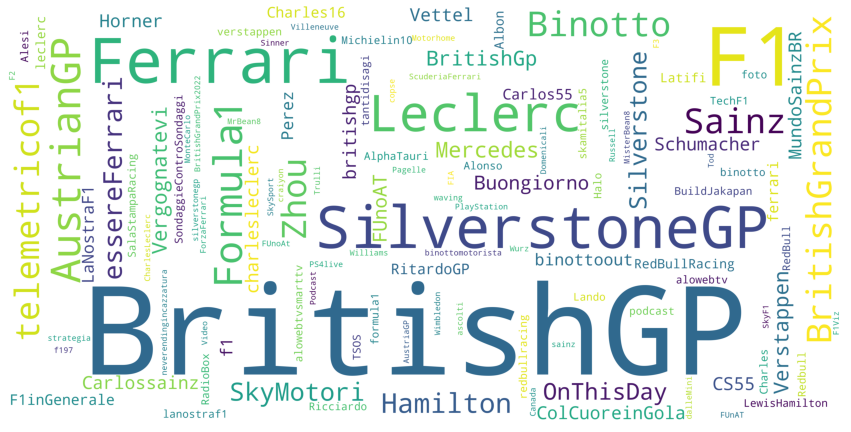

In [37]:
#eseguo il plot: 
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off") # togliere gli assi
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Wordcloud_hashtag.jpg')  

Vogliamo iniziare a lavorare sul testo dei tweet: qui sarà necessario eseguire un cleaning e preprocessing dei dati. 

# Parte 4 - Data cleaning/processing

In [ ]:
df["text"]

In [39]:
# dobbiamo ripulire i testi
import nltk #libreria molto utile per la pulizia delle stop-words e della punteggiatura

# tramite questa libreria facciamo il download delle stop-words e della punteggiatura
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re #regular expressions: pattern per individuare delle parole
import string # contiene i simboli di punteggiatura

In [ ]:
# cominciamo con una frase di esempio
example_sent = df.loc[0, "text"]
example_sent 

devono essere eliminate le stop-words, eliminata la punteggiatura e trasformate le maiuscole in minuscole

In [ ]:
# rimozione links
filtered_sentence = re.sub(r"http\S+", "", example_sent)
filtered_sentence

In [ ]:
# lowercasing
filtered_sentence = filtered_sentence.lower()
filtered_sentence

In [44]:
# remove stop-words
stop_words = set(stopwords.words("italian"))
word_tokens = word_tokenize(filtered_sentence)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence

['rt',
 '@',
 'ferrari24h',
 ':',
 'bon',
 'week-end',
 'de',
 'gp',
 'de',
 'grande',
 'bretagne',
 '🇬🇧',
 'forza',
 'ferrari',
 '🇮🇹🏁',
 '#',
 'f1',
 '#',
 'ferrari',
 '#',
 'britishgp',
 '#',
 'carlos55',
 '🇪🇸',
 '#',
 'charles16',
 '🇲🇨',
 '@',
 'jjlemans37…']

In [ ]:
# remove rt pattern: trattandosi di un retweet devo considerare solo le parole che compaiono dopo il quarto elemento della lista.
if filtered_sentence[0] == "rt":
    filtered_sentence = filtered_sentence[4:]

filtered_sentence

In [ ]:
# remove punteggiatura
# lo faccio tramite una operazione di filtraggio
filtered_sentence = list(filter(lambda token: token not in string.punctuation, filtered_sentence))
filtered_sentence

dobbiamo insierire tutte le operazioni fatte fin qui in una funzione python che le applichi a tutti i testi dei tweet del mio dataset

In [47]:
def clean(df):
    sentence = df["text"]

    # rimozione links
    filtered_sentence = re.sub(r"http\S+", "", sentence)

    # lowercasing
    filtered_sentence = filtered_sentence.lower()

    # remove stop-words
    stop_words = set(stopwords.words("italian"))
    word_tokens = word_tokenize(filtered_sentence)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]

    # remove rt pattern: trattandosi di un retweet devo considerare solo le parole che compaiono dopo il quarto elemento della lista.
    if filtered_sentence[0] == "rt":
        filtered_sentence = filtered_sentence[4:]

    # remove punteggiatura
    filtered_sentence = list(filter(lambda token: token not in string.punctuation, filtered_sentence))


    # vado a restituire una stringa unica con le parole restanti separate da spazi
    return " ".join(filtered_sentence)



In [48]:
# applichiamo la funzione alla colonna del dataframe scrivendo i dati nel dataframe ma in una nuova colonna 

#creo la nuova colonna del dataframe che è la copia della colonna text
df["cleaned_text"] = df.apply(clean, axis=1)

In [ ]:
df[["text", "cleaned_text"]].head()

salviamo i risultati delle elaborazioni in un file csv

In [122]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/BritishGB_cleaned_1000.csv", index=False)

Questo sarà il dataset da cui partiremo per ricavare nuove features!